In [1]:
import numpy as np
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [2]:
incept_v3_pretrained = keras.applications.inception_v3.InceptionV3(
    weights='imagenet',
    include_top=True
)
print(incept_v3_pretrained.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [43]:
# Inception V3 preprocess_input
# def preprocess_input(x):
#     x /= 255.
#     x -= 0.5
#     x *= 2.
#     return x
# RGB format

# plt.imshow(img)
# plt.show()

# plt.imshow(x[0])
# plt.show()

SyntaxError: invalid syntax (1437302649.py, line 1)

In [39]:
output = incept_v3_pretrained.predict(x)
# print(output)
top1 = keras.applications.inception_v3.decode_predictions(output, top = 1)
_, name, prop = top1[0][0]
print(name, prop*100)

1/1 [==============================] - 3s 3s/step
clog 99.86969828605652


In [9]:
img_cv = cv2.imread('./fig/airplane_1.jpg')
text = 'Airliner, 88%'
cv2.putText(img_cv, text, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1,
            (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('img', img_cv)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
import glob

img_paths = glob.glob('./fig/*.*')

# display(img_paths)

idx = 0
while True:
    img = keras.preprocessing.image.load_img(img_paths[idx], 
                                             target_size=(299, 299))
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.inception_v3.preprocess_input(x)
    
    output = incept_v3_pretrained.predict(x)
    top_1 = keras.applications.inception_v3.decode_predictions(output, top = 1)
    _, name, prop = top_1[0][0]
    
    img_cv = cv2.imread(img_paths[idx])
    text = f'{name}, {100*prop:.2f}%'
    cv2.putText(img_cv, text, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1,
            (0, 0, 255), 2, cv2.LINE_AA)
    
    cv2.imshow('img', img_cv)
    
    if cv2.waitKey(3000) == 27:
        break
    
    idx += 1
    if idx >= len(img_paths):
        idx = 0
        
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 39ms/step


In [14]:
vgg16_pretrain = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=True
)

vgg16_pretrain.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
img_path = './fig/car1.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

# plt.imshow(img)
# plt.show()

# plt.imshow(x[0])
# plt.show()

output = vgg16_pretrain.predict(x)
top_5 = keras.applications.vgg16.decode_predictions(output, top = 5)
display(top_5)

1/1 [==============================] - 1s 1s/step


[[('n04285008', 'sports_car', 0.4812334),
  ('n04037443', 'racer', 0.4288767),
  ('n02974003', 'car_wheel', 0.04232954),
  ('n03100240', 'convertible', 0.022202995),
  ('n03930630', 'pickup', 0.00773342)]]

In [18]:
import glob

img_path_ad = glob.glob('./vgg16_transfer/train/ad/*.*') + glob.glob('./vgg16_transfer/test/ad/*.*')
img_path_normal = glob.glob('./vgg16_transfer/train/normal/*.*') + glob.glob('./vgg16_transfer/test/normal/*.*')

print('ad length = ', len(img_path_ad))
print('normal length = ', len(img_path_normal))

img_paths = img_path_ad + img_path_normal
print(len(img_paths))
display(img_paths)

ad length =  140
normal length =  140
280


['./vgg16_transfer/train/ad\\ad_train_1.jpg',
 './vgg16_transfer/train/ad\\ad_train_10.jpg',
 './vgg16_transfer/train/ad\\ad_train_11.jpg',
 './vgg16_transfer/train/ad\\ad_train_12.jpg',
 './vgg16_transfer/train/ad\\ad_train_13.jpg',
 './vgg16_transfer/train/ad\\ad_train_14.jpg',
 './vgg16_transfer/train/ad\\ad_train_15.jpg',
 './vgg16_transfer/train/ad\\ad_train_16.jpg',
 './vgg16_transfer/train/ad\\ad_train_17.jpg',
 './vgg16_transfer/train/ad\\ad_train_18.jpg',
 './vgg16_transfer/train/ad\\ad_train_19.jpg',
 './vgg16_transfer/train/ad\\ad_train_2.jpg',
 './vgg16_transfer/train/ad\\ad_train_20.jpg',
 './vgg16_transfer/train/ad\\ad_train_21.jpg',
 './vgg16_transfer/train/ad\\ad_train_22.jpg',
 './vgg16_transfer/train/ad\\ad_train_23.jpg',
 './vgg16_transfer/train/ad\\ad_train_24.jpg',
 './vgg16_transfer/train/ad\\ad_train_25.jpg',
 './vgg16_transfer/train/ad\\ad_train_26.jpg',
 './vgg16_transfer/train/ad\\ad_train_27.jpg',
 './vgg16_transfer/train/ad\\ad_train_28.jpg',
 './vgg16_trans

In [19]:
imgs = np.zeros((0, 150, 150, 3), np.float32)

for i in img_paths:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img.astype(np.float32))/255.
    img = np.expand_dims(img, axis = 0)
    imgs = np.append(imgs, img, axis = 0)
    
print(imgs.shape)


(280, 150, 150, 3)


In [20]:
target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(imgs, target,
                                                  test_size = 0.2, shuffle=True)


print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
## Functional API
inputs = keras.Input(shape= (150, 150, 3))
Conv1 = keras.layers.Conv2D(64, kernel_size=3, activation='relu')(inputs)
Conv2 = keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu')(Conv1)
max_pool = keras.layers.MaxPool2D(pool_size=2)(Conv2)
flatten_layer = keras.layers.Flatten()(max_pool)
dense1 = keras.layers.Dense(120, activation = 'relu')(flatten_layer)
drop_out = keras.layers.Dropout(0.2)(dense1)
dense2 = keras.layers.Dense(32, activation = 'relu')(drop_out)
output = keras.layers.Dense(1, activation = 'sigmoid')(dense2)

alz_model = keras.Model(inputs = inputs, outputs = output)

alz_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_94 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 conv2d_95 (Conv2D)          (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 120)               20463480  
                                                             

In [23]:
alz_model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['acc'])
early_stop = keras.callbacks.EarlyStopping(patience = 3)
# check_model = keras.callbacks.ModelCheckpoint(filepath='./alz_model.h5',
#                                               save_best_only=True)

In [24]:
history = alz_model.fit(X_train, y_train, epochs = 100,
                        batch_size = 20,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stop])

Epoch 1/100
12/12 [==============================] - 4s 165ms/step - loss: 0.8625 - acc: 0.4420 - val_loss: 0.6454 - val_acc: 0.8571
Epoch 2/100
12/12 [==============================] - 1s 74ms/step - loss: 0.6051 - acc: 0.7768 - val_loss: 0.5130 - val_acc: 0.7679
Epoch 3/100
12/12 [==============================] - 1s 78ms/step - loss: 0.3871 - acc: 0.8080 - val_loss: 0.2517 - val_acc: 0.8929
Epoch 4/100
12/12 [==============================] - 1s 71ms/step - loss: 0.2117 - acc: 0.9286 - val_loss: 0.1269 - val_acc: 0.9821
Epoch 5/100
12/12 [==============================] - 1s 72ms/step - loss: 0.0801 - acc: 0.9732 - val_loss: 0.0615 - val_acc: 0.9821
Epoch 6/100
12/12 [==============================] - 1s 73ms/step - loss: 0.0763 - acc: 0.9732 - val_loss: 0.0332 - val_acc: 0.9821
Epoch 7/100
12/12 [==============================] - 1s 77ms/step - loss: 0.1068 - acc: 0.9643 - val_loss: 0.0688 - val_acc: 0.9821
Epoch 8/100
12/12 [==============================] - 1s 74ms/step - loss: 0

In [25]:
# alz_model.load_weights('./vgg16_transfer/alz_model.h5')
alz_model.evaluate(X_val, y_val)

2/2 [==============================] - 1s 501ms/step - loss: 0.1157 - acc: 0.9821


[0.11570519953966141, 0.9821428656578064]

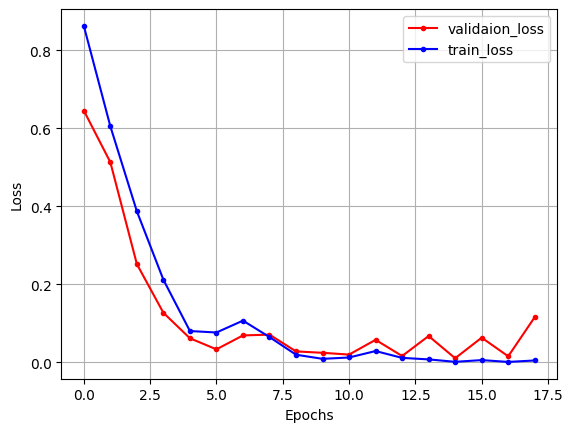

In [26]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, marker = '.', c = 'r', label = 'validaion_loss')
plt.plot(train_loss, marker = '.', c = 'b', label = 'train_loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [27]:
import os
ad_list_train = os.listdir('./vgg16_transfer/train/ad')
normal_list_train = os.listdir('./vgg16_transfer/train/normal')

ad_list_test = os.listdir('./vgg16_transfer/test/ad')
normal_list_test = os.listdir('./vgg16_transfer/test/normal')

ad_lists_train = []
for i in ad_list_train:
    ad_list_train = './vgg16_transfer/train/ad/' + i
    ad_lists_train.append(ad_list_train)
    
ad_lists_test = []
for i in ad_list_test:
    ad_list_test = './vgg16_transfer/test/ad/' + i
    ad_lists_test.append(ad_list_test)
    
normal_lists_train = []
for i in normal_list_train:
    nor_list_train = './vgg16_transfer/train/normal/' + i
    normal_lists_train.append(nor_list_train)
    
normal_lists_test = []
for i in normal_list_test:
    nor_list_test = './vgg16_transfer/test/normal/' + i
    normal_lists_test.append(nor_list_test)
    
file_lists = ad_lists_train  + ad_lists_test + normal_lists_train + normal_lists_test
display(file_lists)

['./vgg16_transfer/train/ad/ad_train_1.jpg',
 './vgg16_transfer/train/ad/ad_train_10.jpg',
 './vgg16_transfer/train/ad/ad_train_11.jpg',
 './vgg16_transfer/train/ad/ad_train_12.jpg',
 './vgg16_transfer/train/ad/ad_train_13.jpg',
 './vgg16_transfer/train/ad/ad_train_14.jpg',
 './vgg16_transfer/train/ad/ad_train_15.jpg',
 './vgg16_transfer/train/ad/ad_train_16.jpg',
 './vgg16_transfer/train/ad/ad_train_17.jpg',
 './vgg16_transfer/train/ad/ad_train_18.jpg',
 './vgg16_transfer/train/ad/ad_train_19.jpg',
 './vgg16_transfer/train/ad/ad_train_2.jpg',
 './vgg16_transfer/train/ad/ad_train_20.jpg',
 './vgg16_transfer/train/ad/ad_train_21.jpg',
 './vgg16_transfer/train/ad/ad_train_22.jpg',
 './vgg16_transfer/train/ad/ad_train_23.jpg',
 './vgg16_transfer/train/ad/ad_train_24.jpg',
 './vgg16_transfer/train/ad/ad_train_25.jpg',
 './vgg16_transfer/train/ad/ad_train_26.jpg',
 './vgg16_transfer/train/ad/ad_train_27.jpg',
 './vgg16_transfer/train/ad/ad_train_28.jpg',
 './vgg16_transfer/train/ad/ad_train

In [28]:
# target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))

def img_prep(i):
    x = keras.preprocessing.image.load_img(i, target_size=(150, 150))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.vgg16.preprocess_input(x)
    
    return x

In [29]:
imgs = np.zeros((0, 150, 150, 3), np.float32)

for i in file_lists:
    # print(type(i))
    x = img_prep(i)
    imgs = np.append(imgs, x, axis = 0)
    
print(imgs.shape)

(280, 150, 150, 3)


In [30]:
type(target)

numpy.ndarray

In [31]:
X_train, X_val, y_train, y_val = train_test_split(imgs, target, test_size=0.2,
                                                  shuffle=True)

print(X_train.shape)
print(X_val.shape)


(224, 150, 150, 3)
(56, 150, 150, 3)


In [32]:
transfer_vgg16 = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

transfer_vgg16.trainable = False
transfer_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
finetun_vgg16 = keras.models.Sequential()
finetun_vgg16.add(transfer_vgg16)
finetun_vgg16.add(keras.layers.Flatten())
finetun_vgg16.add(keras.layers.Dense(64, activation='relu'))
finetun_vgg16.add(keras.layers.Dropout(0.2))
finetun_vgg16.add(keras.layers.Dense(1, activation='sigmoid'))
finetun_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
finetun_vgg16.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['acc'])
early_stop = keras.callbacks.EarlyStopping(patience = 10)

In [35]:
history = finetun_vgg16.fit(X_train, y_train, epochs = 100,
                        batch_size = 20,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stop])

Epoch 1/100
12/12 [==============================] - 11s 517ms/step - loss: 3.6630 - acc: 0.7411 - val_loss: 0.8283 - val_acc: 0.9286
Epoch 2/100
12/12 [==============================] - 2s 134ms/step - loss: 0.6726 - acc: 0.9018 - val_loss: 1.3119 - val_acc: 0.9107
Epoch 3/100
12/12 [==============================] - 2s 135ms/step - loss: 0.6570 - acc: 0.9330 - val_loss: 0.3089 - val_acc: 0.9643
Epoch 4/100
12/12 [==============================] - 2s 135ms/step - loss: 0.3621 - acc: 0.9732 - val_loss: 0.6718 - val_acc: 0.9464
Epoch 5/100
12/12 [==============================] - 2s 135ms/step - loss: 0.1400 - acc: 0.9732 - val_loss: 0.6593 - val_acc: 0.9464
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 0.1118 - acc: 0.9866 - val_loss: 0.6469 - val_acc: 0.9464
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0641 - acc: 0.9866 - val_loss: 0.4521 - val_acc: 0.9464
Epoch 8/100
12/12 [==============================] - 2s 138ms/step -

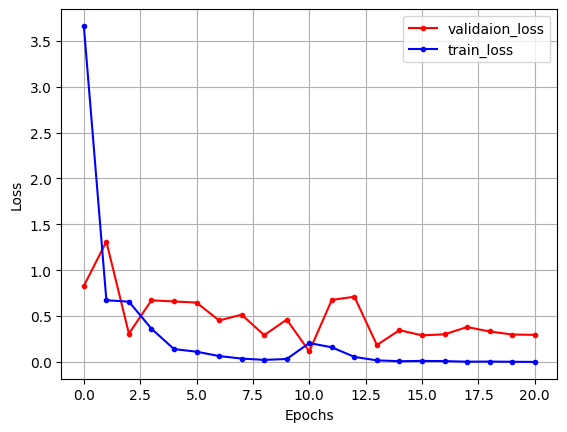

In [36]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, marker = '.', c = 'r', label = 'validaion_loss')
plt.plot(train_loss, marker = '.', c = 'b', label = 'train_loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
